In [ ]:
#14-15 cols in dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df = pd.read_csv("bankloan.csv")

In [ ]:
df.shape

(5000, 14)

In [ ]:
df

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
print("Data types:")
print(df.dtypes)



Data types:
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())




Missing values per column:
ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())




Descriptive statistics for numerical columns:
                ID          Age   Experience       Income      ZIP.Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal.Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   10

In [ ]:
df = df.drop(columns=["ID", "ZIP.Code"])


In [ ]:
X = df.drop(columns=["Personal.Loan"])
y = df["Personal.Loan"]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X, y):

    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    model = DecisionTreeClassifier(random_state=42, max_depth=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


In [ ]:
final_model = DecisionTreeClassifier(random_state=42, max_depth=4)
final_model.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = final_model.predict(X)
print("\nClassification Report:\n")
print(classification_report(y, y_pred, target_names=["No Loan", "Loan"]))


Classification Report:

              precision    recall  f1-score   support

     No Loan       0.99      1.00      0.99      4520
        Loan       0.97      0.86      0.91       480

    accuracy                           0.98      5000
   macro avg       0.98      0.93      0.95      5000
weighted avg       0.98      0.98      0.98      5000



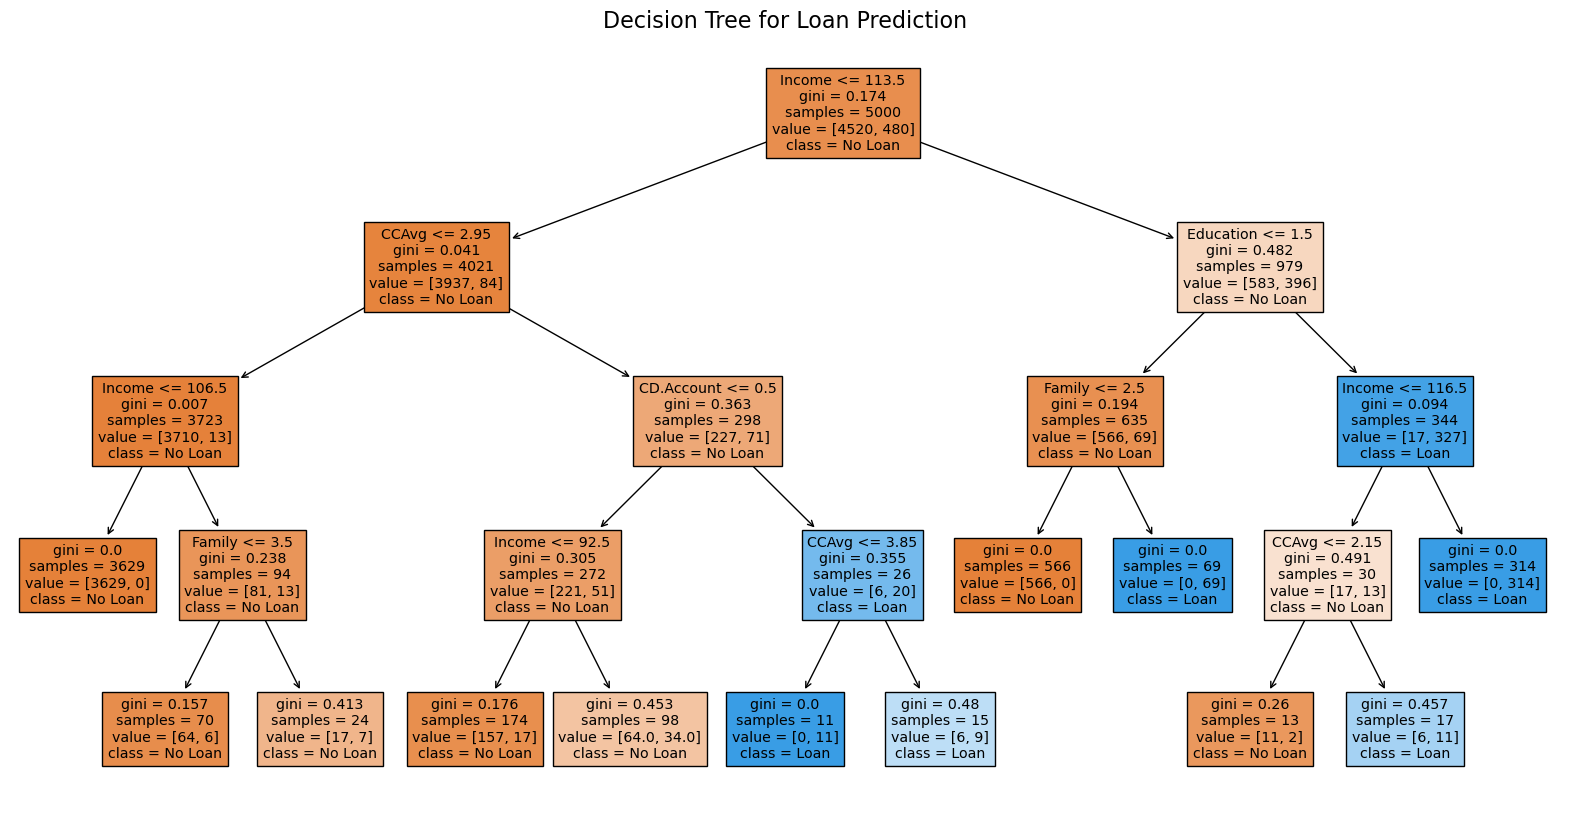

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(final_model, feature_names=X.columns,
          class_names=["No Loan", "Loan"], filled=True)
plt.title("Decision Tree for Loan Prediction", fontsize=16)
plt.show()